In [1]:
#!pip install opencv-python mediapipe


**MediaPipe** is a cross-platform pipeline framework to build custom machine-learning solutions for live and streaming media
- gesture recognition
- face detection
- instant Motion Tracking
- and a touchless control interface.

In [1]:
import cv2
import mediapipe as mp


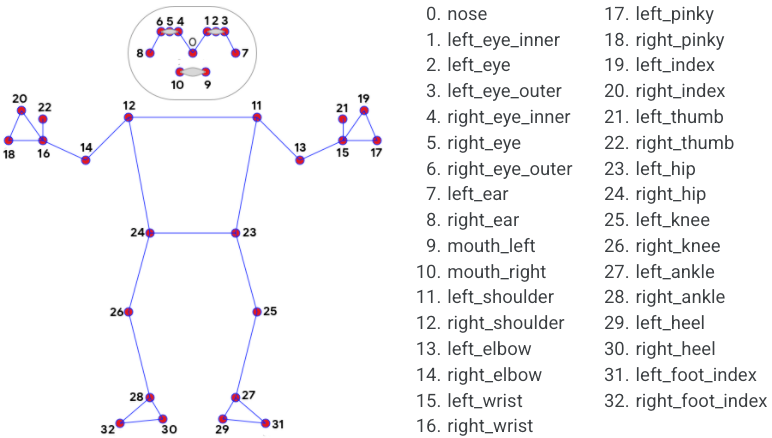

In [5]:
import numpy as np
import cv2
import mediapipe as mp
import time
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
pose = mp.solutions.pose.Pose()

cap=cv2.VideoCapture(0)
cap.set(3,1280)
cap.set(4,720)
pTime=0 #store the previous frame time for calculating FPS (Frames Per Second) later.
x1,x2,x3,y1,y2,y3=np.inf,np.inf,np.inf,np.inf,np.inf,np.inf#store pose landmark coordinates
while True:
    ret,image=cap.read()
    if ret==False :
        break
        
    image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)#flipmirrors:0 x-axis | positive y-axis|Negative both axes
    results = pose.process(image)#process pre-loaded MediaPipe pose model beforee writable false no processing
    rows, cols, _ = image.shape
    if cv2.waitKey(1) == ord('q'):
                break
    
    if results.pose_landmarks:#is there is posion
        #mp_drawing.draw_landmarks( image, results.pose_landmarks,mp_pose.POSE_CONNECTIONS)
        for id , lm in enumerate(results.pose_landmarks.landmark):
            
            cx,cy=int(lm.x*cols) , int(lm.y *rows )
            if id == 0 :
                x1,y1=cx,cy
                cv2.circle(image,(cx,cy),10,(0,0,255),-1)
            elif id == 11 :
                x2,y2=cx,cy
                cv2.circle(image,(cx,cy),10,(0,255,0),-1)
            elif id == 12 :
                x3,y3=cx,cy
                cv2.circle(image,(cx,cy),10,(255,0,0),-1)
            mid=(x2+x3)//2 
            if mid - 50 < x1 < mid + 50 and y2 - y1 > 100 :
                cv2.putText(image,"Midel",(100,100),cv2.FONT_HERSHEY_PLAIN,3,(0,0,255),3)
            elif x1 - x2 < x3 - x1 and y2 - y1 > 100 :
                cv2.putText(image,"Left",(100,100),cv2.FONT_HERSHEY_PLAIN,3,(0,0,255),3)
            elif x1 - x2 > x3 - x1 and y2 - y1 > 100 :
                cv2.putText(image,"Right",(100,100),cv2.FONT_HERSHEY_PLAIN,3,(0,0,255),3)
            elif y2 - y1 < 300 :
                cv2.putText(image,"Down",(100,100),cv2.FONT_HERSHEY_PLAIN,3,(0,0,255),3)
            
            
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    cTime=time.time()
    fps=1/(cTime-pTime)
    pTime=cTime
    cv2.putText(image,str(int(fps)),(70,50),cv2.FONT_HERSHEY_PLAIN,3,(0,0,255),3)
    cv2.imshow('MediaPipe Hands', image)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

In [4]:
# for landmark in results.landmark_list:
#     presence=landmark.presence
#     print(landmark.id,presence)

AttributeError: type object 'SolutionOutputs' has no attribute 'landmark_list'

# test camera

In [4]:
import numpy as np
import cv2 as cv
 
cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
 # Capture frame-by-frame
    ret, frame = cap.read()
 
 # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
 # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
 # Display the resulting frame
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
 
#When everything done, release the capture
cap.release()
cv.destroyAllWindows()

KeyboardInterrupt: 

In [ ]:
cap = cv2.VideoCapture(0)  # Change 0 to video file path if needed


## mediapipe take rotation of face coordinates

In [7]:
import cv2
import mediapipe as mp
import numpy as np
import time

mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh

face_mesh = mp_face_mesh.FaceMesh(min_detection_confidence=0.5,min_tracking_confidence=0.5)
drawing_spec = mp_drawing.DrawingSpec(thickness=2,circle_radius=2,color=(255,0,255))

cap = cv2.VideoCapture(0)

while True:
    # Read frame from webcam
    start = time.time()
    success, image = cap.read()
    image = cv2.resize(image,(1200,800))
    
    image = cv2.cvtColor(cv2.flip(image,1),cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = face_mesh.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image , cv2.COLOR_RGB2BGR)

    img_h , img_w , img_c = image.shape
    
    face_3d = []
    face_2d = []

    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            for idx , lm in enumerate(face_landmarks.landmark):
                if idx == 33 or idx == 263 or idx == 1 or idx == 61 or idx == 291 or idx == 199:
                    if idx == 1:
                        nose_2d = (lm.x*img_w , lm.y*img_h)
                        nose_3d = (lm.x*img_w , lm.y*img_h , lm.z*3000)
                        #print("lm.z",lm.z)
                        #print("lm.z",lm.z*3000)

                    x , y = int(lm.x*img_w) , int(lm.y*img_h)
                    face_2d.append([x,y])
                    face_3d.append([x,y,lm.z])
                        
            face_2d = np.array(face_2d , dtype=np.float64)
            face_3d = np.array(face_3d , dtype=np.float64)


            focal_length = 1 * img_w
            cam_matrix = np.array([[focal_length , 0 , img_h / 2],
                                  [0 , focal_length , img_w / 2],
                                  [0 , 0 , 1 ]])
            
            dist_matrix = np.zeros((4,1) , dtype=np.float64)
            success , rot_vec , trans_vec = cv2.solvePnP(face_3d , face_2d , cam_matrix , dist_matrix)

            rmat , jac = cv2.Rodrigues(rot_vec)

            angles , mtxR , mtxQ , Qx , Qy , Qz = cv2.RQDecomp3x3(rmat)  #into an upper triangular matrix (mtxR) and an orthogonal matrix (mtxQ), such that rmat = mtxR * mtxQ.

            x = angles[0] * 360
            y = angles[1] * 360
            z = angles[2] * 360

            if y < -10:
                text = "looking left"
            elif y > 7:
                text = "looking Right"
            elif x < -10:
                text = "looking Down"
            elif x > 10:
                text = "looking Up"    
            else:
                text = "forward"
                
            nose_3d = cv2.projectPoints(nose_3d , rot_vec , trans_vec , cam_matrix , dist_matrix)

            p1 = (int(nose_2d[0]) , int(nose_2d[1]))
            p2 = (int(nose_2d[0] + y * 10), int(nose_2d[1] - x * 10))
            cv2.line(image , p1 , p2 , (255,0,0) , 3)

            cv2.putText(image, text, (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 2 , (0, 255, 0), 2)      
            cv2.putText(image, 'x: ' + str(np.round(x,2)), (500, 50), cv2.FONT_HERSHEY_SIMPLEX, 1 , (0, 0, 255), 2)
            cv2.putText(image, 'y: ' + str(np.round(y,2)), (500, 100), cv2.FONT_HERSHEY_SIMPLEX, 1 , (0, 0, 255), 2)
            cv2.putText(image, 'z: ' + str(np.round(z,2)), (500, 150), cv2.FONT_HERSHEY_SIMPLEX, 1 , (0, 0, 255), 2)

            end = time.time()
            totalTime = end - start
            fps = 1/totalTime
            print('FPS' , fps)
            cv2.putText(image, f'FPS: {int(fps)}', (20, 250), cv2.FONT_HERSHEY_SIMPLEX, 1.5 , (0, 255, 0), 2) 

            mp_drawing.draw_landmarks(
                image=image,
                landmark_list=face_landmarks,
                landmark_drawing_spec=drawing_spec,
                connection_drawing_spec=drawing_spec)
            
        # Display the result
        cv2.imshow("Head Pose Estimation", image)

        # Check for key press
        key = cv2.waitKey(1)
        if key == ord("q"):
            break

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()   

    
    

FPS 3.0299315894790833
FPS 37.07508176434191
FPS 20.635978981756637
FPS 25.19162021910436
FPS 17.4744464118321
FPS 21.69931502597107
FPS 20.416497515053276
FPS 24.813228029697992
FPS 14.927092453004777
FPS 21.888083496412264
FPS 17.359523868649994
FPS 33.38510275880733
FPS 16.18097927565082
FPS 34.3103578031183
FPS 46.68169929548465
FPS 40.63460569657043
FPS 15.89974108879176
FPS 14.69144252223347
FPS 18.536639693111358
FPS 22.680740612562726
FPS 33.99473176583104
FPS 19.954821827870024
FPS 17.220188119177728
FPS 30.760177477906932
FPS 34.73629986666335
FPS 30.5999460125922
FPS 31.960010972598983
FPS 16.806257212463137
FPS 18.398491029521427
FPS 15.231134045326952
FPS 21.795838616475088
FPS 16.09442606847118
FPS 24.237806851278258
FPS 16.039955486039673
FPS 18.49666607867349
FPS 34.15612632127559
FPS 23.27027401896329
FPS 20.737599873427737
FPS 28.538504456691843
FPS 15.386915832993994
FPS 28.918655800548823
FPS 26.692190204663476
FPS 21.44963230405744
FPS 17.70480620678593
FPS 14.6535